In [112]:
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('bank-additional-full.csv',sep=';',engine='python')

Attribute Information:
* bank client data:\
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')\
* related with the last contact of the current campaign:\
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.\
* other attributes:\
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')\
* social and economic context attributes\
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)\

Output variable (desired target):\
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

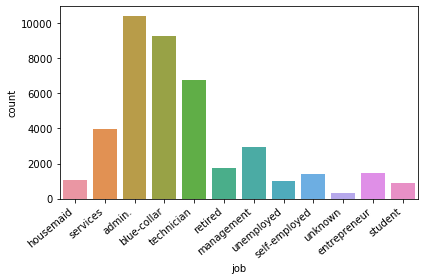

In [7]:
ax = sns.countplot(x="job", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [8]:
len(df[df['job']=='unknown'])/len(df)

0.008012042342429833

In [9]:
df['job'].mode()

0    admin.
dtype: object

In [10]:
df.loc[df['job']=='unknown','job']='admin'

In [11]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'admin',
       'entrepreneur', 'student'], dtype=object)

In [12]:
df['job']=df['job'].str.replace('.','')

In [13]:
df['job'].unique()

array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [14]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
len(df[df['marital']=='unknown'])/len(df)

0.0019423132951345051

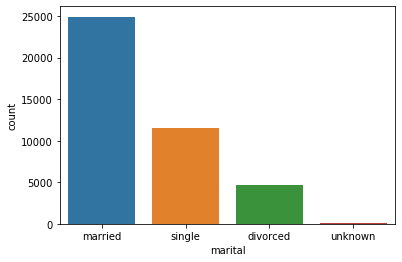

In [16]:
sns.countplot(x='marital', data=df)

In [17]:
df['marital'].mode()

0    married
dtype: object

In [18]:
df.loc[df['marital']=='unknown','marital']='married'

In [19]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [21]:
len(df[df['education']=='unknown'])/len(df)

0.042026803923472855

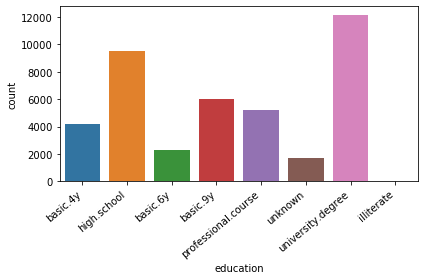

In [22]:
ax = sns.countplot(x="education", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [23]:
df['education'].mode()

0    university.degree
dtype: object

In [24]:
df.loc[df['education']=='unknown','education']='university.degree'

In [25]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

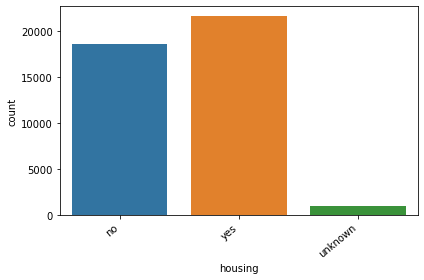

In [28]:
ax = sns.countplot(x="housing", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [29]:
df['housing']

0         no
1         no
2        yes
3         no
4         no
        ... 
41183    yes
41184     no
41185    yes
41186     no
41187    yes
Name: housing, Length: 41188, dtype: object

In [30]:
len(df[df['housing']=='unknown'])/len(df)

0.0240361270272895

In [31]:
df['housing'].mode()

0    yes
dtype: object

In [32]:
df.loc[df['housing']=='unknown','housing']='yes'

In [33]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

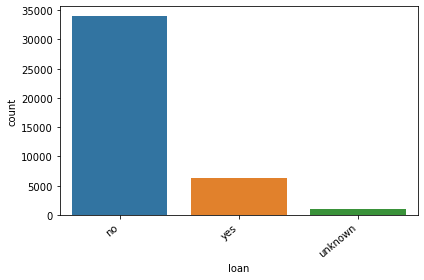

In [35]:
ax = sns.countplot(x="loan", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [36]:
len(df[df['loan']=='unknown'])/len(df)

0.0240361270272895

In [37]:
df['loan'].mode()

0    no
dtype: object

In [38]:
df.loc[df['loan']=='unknown','loan']='no'

In [39]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [41]:
len(df[df['default']=='unknown'])/len(df)

0.20872584247839177

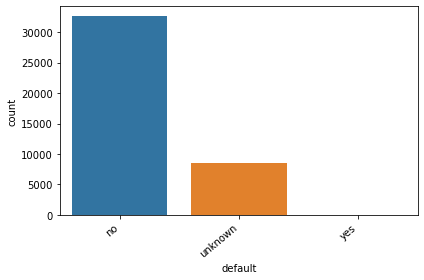

In [42]:
ax = sns.countplot(x="default", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [43]:
df.drop('default', axis=1, inplace=True)

In [44]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [45]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [46]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

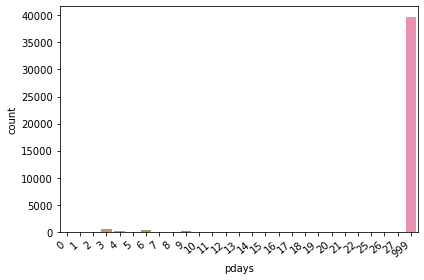

In [47]:
ax = sns.countplot(x="pdays", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [48]:
len(df[df['pdays']==999])/len(df)

0.9632174419733903

In [49]:
df.drop('pdays', axis=1, inplace=True)

In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

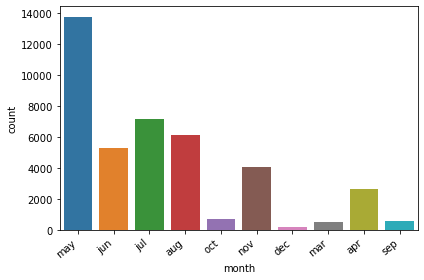

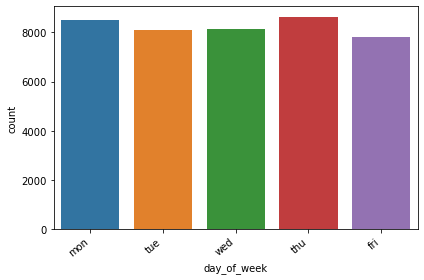

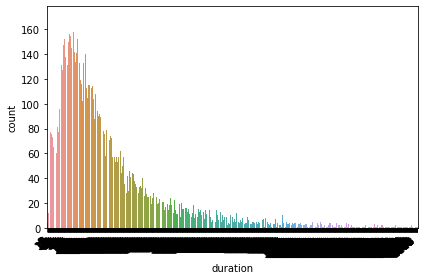

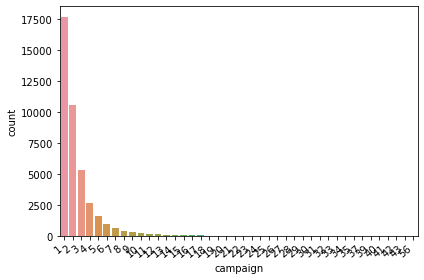

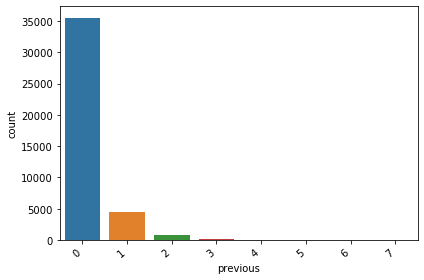

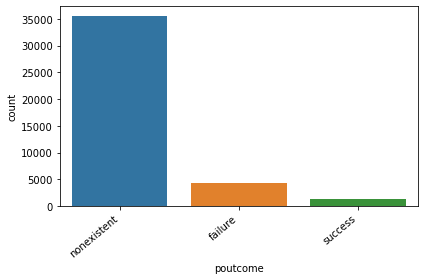

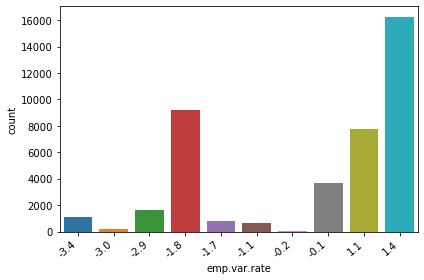

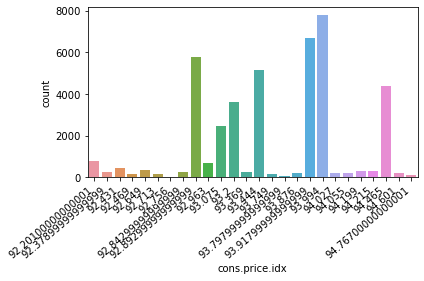

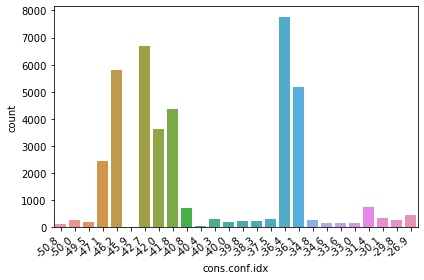

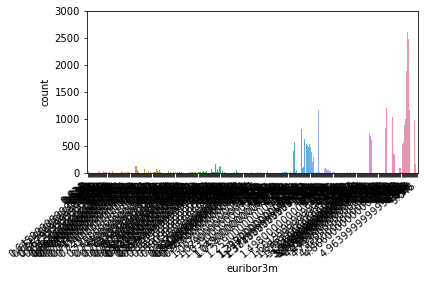

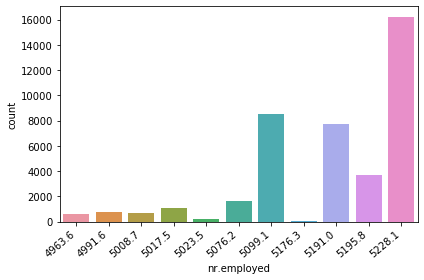

In [51]:
remaining_cols=['month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']
for n in remaining_cols:
    ax = sns.countplot(x=n, data=df)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    


In [52]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [53]:
df.drop('previous', axis=1, inplace=True)

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 5.7+ MB


Text(0.5, 1.0, 'Target Vs Age')

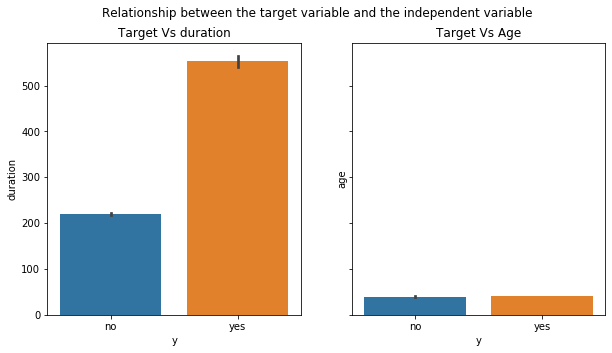

In [56]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Relationship between the target variable and the independent variable')

sns.barplot(ax=axes[0], x=df['y'], y=df['duration']).set_title('Target Vs duration')
sns.barplot(ax=axes[1], x=df['y'], y=df['age']).set_title('Target Vs Age')



In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [58]:
df_new=df[['job','marital','education','housing', 'loan','contact','month','day_of_week', 'campaign', 'poutcome']]


In [59]:
# df_new1=df[['job','marital','education','housing']]

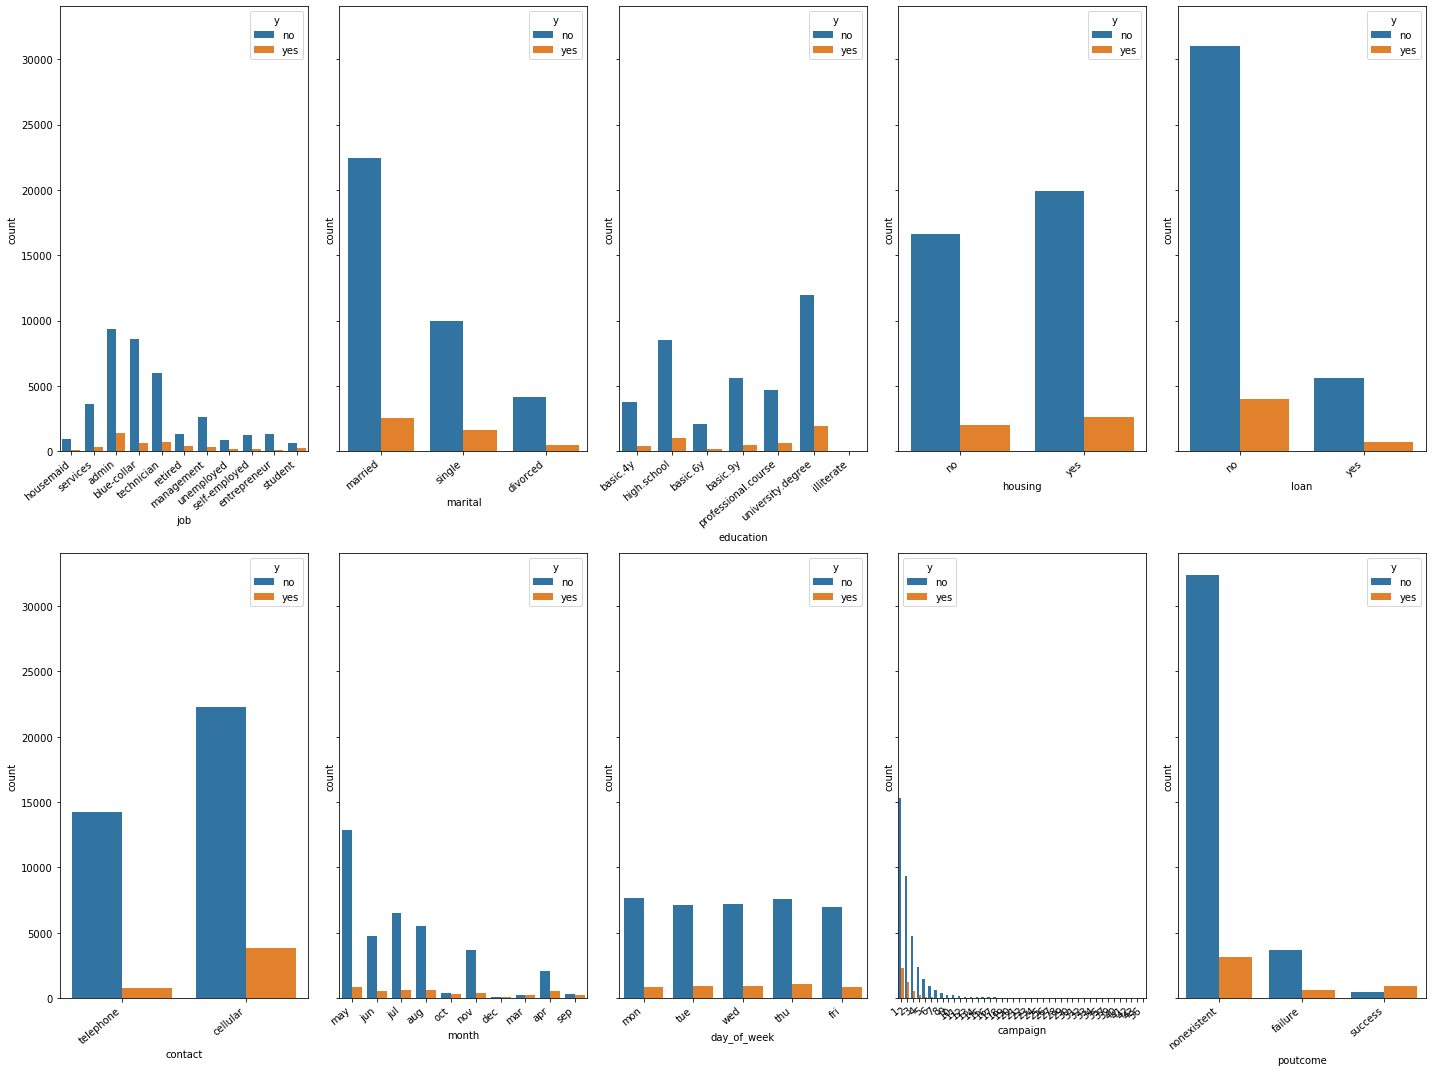

In [60]:
fig, axes = plt.subplots(2,5, figsize=(20, 15), sharey=True)
for col,ax in zip(df_new.columns,axes.flatten()):
    sns.countplot(x=col, hue='y',data=df,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    
    


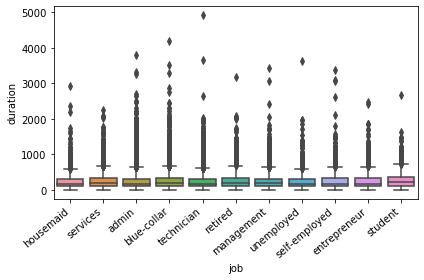

In [61]:
ax = sns.boxplot(x='job',y='duration', data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


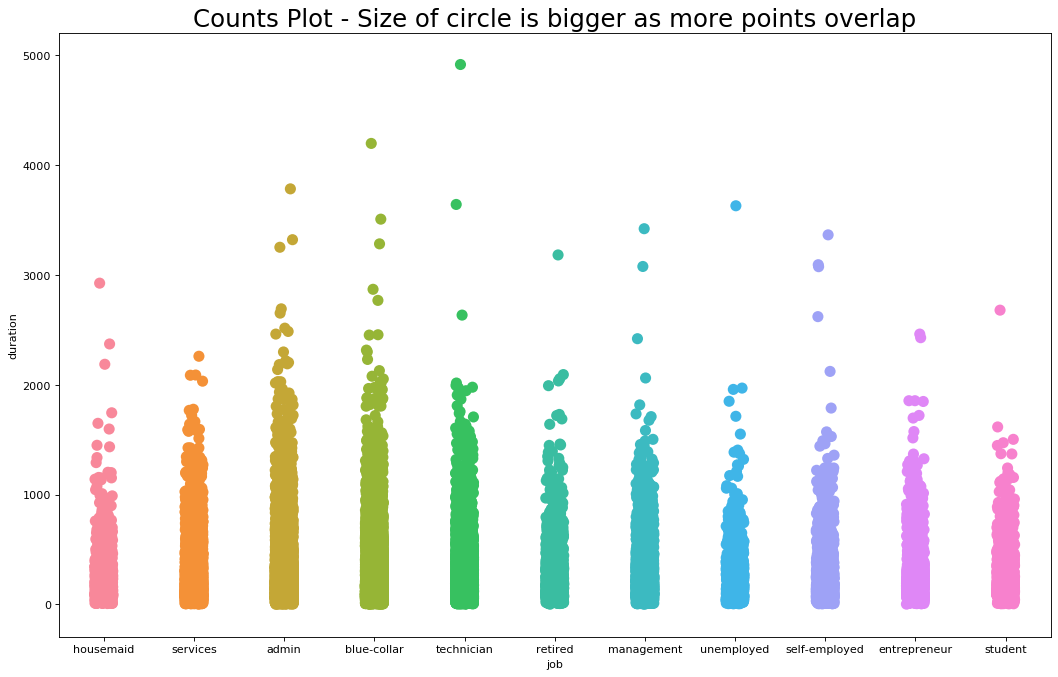

In [62]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df['job'], df['duration'],size=10, ax=ax)
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

In [63]:
# import random
# df1=df.groupby('job').size().reset_index(name='counts')
# n=df['job'].unique().__len__()+1
# all_colors = list(plt.cm.colors.cnames.keys())
# random.seed(100)
# c = random.choices(all_colors, k=n)

In [64]:
# plt.figure(figsize=(16,10), dpi= 80)
# plt.bar(df['job'], df1['counts'], color=c, width=.5)
# for i, val in enumerate(df1['counts'].values):
#     plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
#     plt.gca().set_xticklabels(df['job'], rotation=60, horizontalalignment= 'right')
# plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
# plt.ylabel('# Vehicles')
# plt.ylim(0, 45)
# plt.show()

In [96]:
df_copy=df.copy()
df_copy['month'] = df_copy['month'].astype("category")
df_copy['month'].cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)


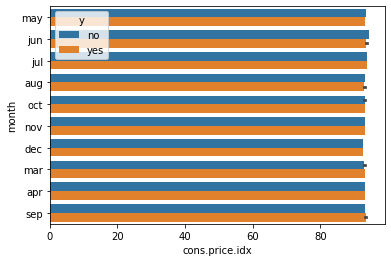

In [84]:
fig, ax = plt.subplots()
sns.barplot(x='cons.price.idx',y='month',hue='y',data=df_copy,ax=ax)

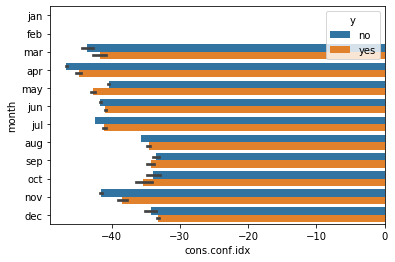

In [101]:
fig, ax = plt.subplots()
sns.barplot(x='cons.conf.idx',y='month',hue='y',data=df_copy,ax=ax)

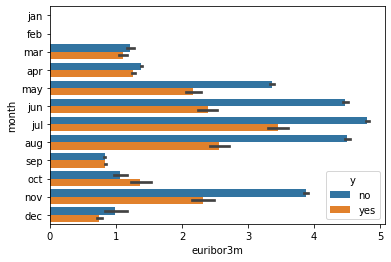

In [98]:
fig, ax = plt.subplots()
sns.barplot(x='euribor3m',y='month',hue='y',data=df_copy,ax=ax)

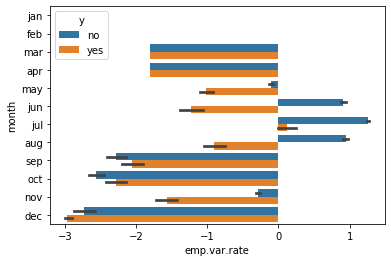

In [99]:
fig, ax = plt.subplots()
sns.barplot(x='emp.var.rate',y='month',hue='y',data=df_copy,ax=ax)

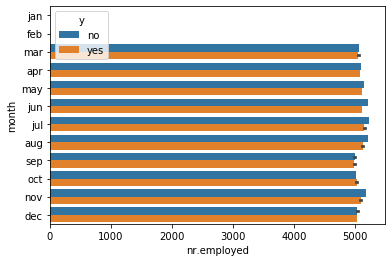

In [100]:
fig, ax = plt.subplots()
sns.barplot(x='nr.employed',y='month',hue='y',data=df_copy,ax=ax)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 5.7+ MB


In [93]:
df_copy=df.copy()
df_copy['month'] = df_copy['month'].astype("category")
df_copy['month'].cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


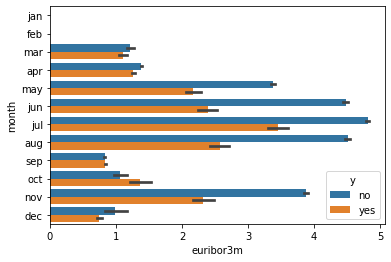

In [94]:
fig, ax = plt.subplots()

sns.barplot(x='euribor3m',y='month',hue='y',data=df_copy,ax=ax)

In [95]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

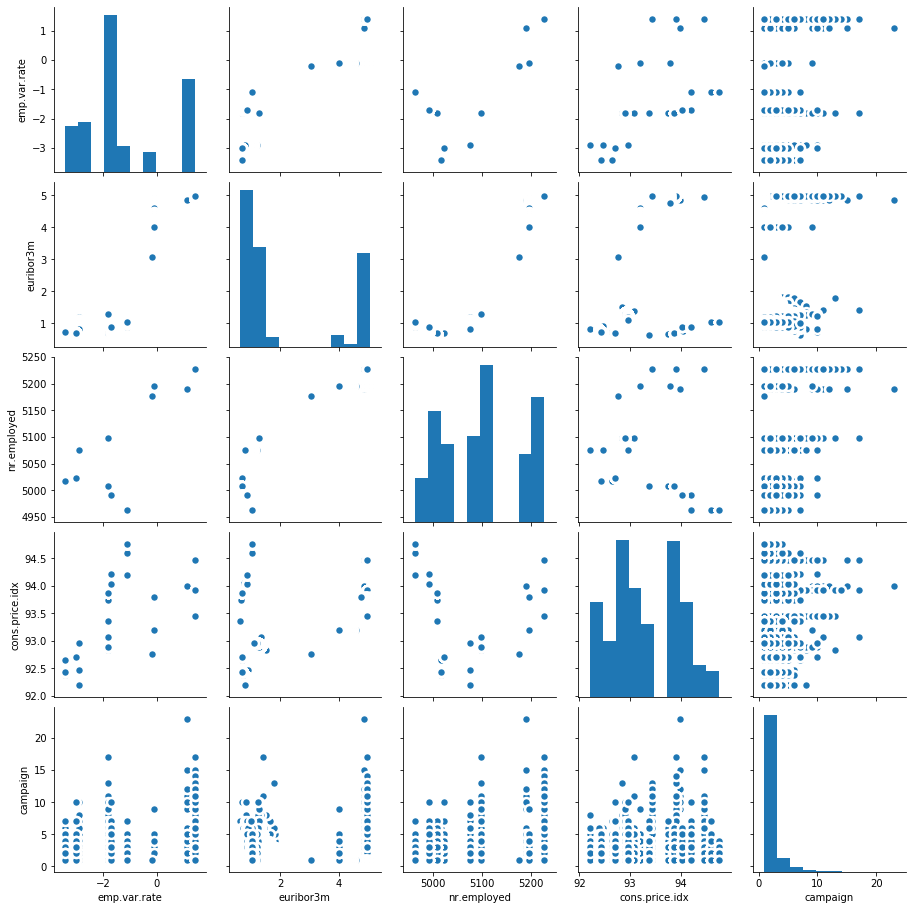

In [187]:

sns.pairplot(df2, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

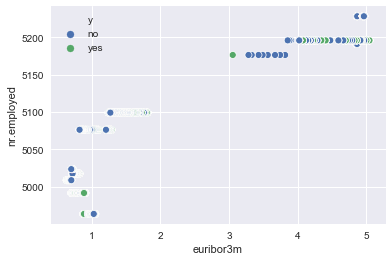

In [115]:
sns.scatterplot(x='euribor3m',y='nr.employed',hue='y',data=df_copy)
plt.show()

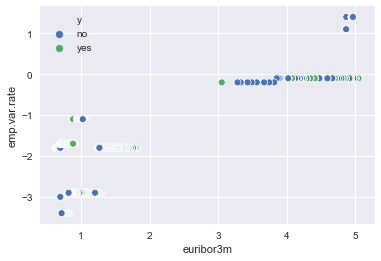

In [116]:
sns.scatterplot(x='euribor3m',y='emp.var.rate',hue='y',data=df_copy)
plt.show()

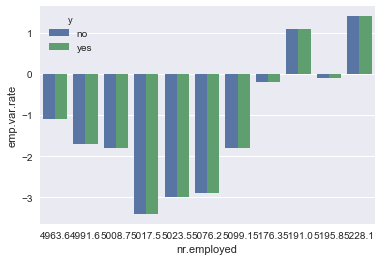

In [118]:
sns.barplot(x='nr.employed',y='emp.var.rate',hue='y',data=df_copy)cons.price.idx
plt.show()

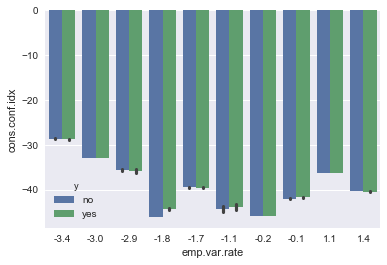

In [135]:
sns.barplot(x='emp.var.rate',y='cons.conf.idx',hue='y',data=df_copy)
plt.show()

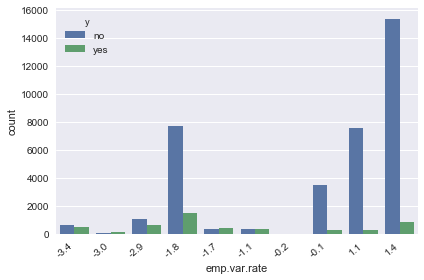

In [137]:
ax = sns.countplot(x="emp.var.rate",hue='y', data=df_copy)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

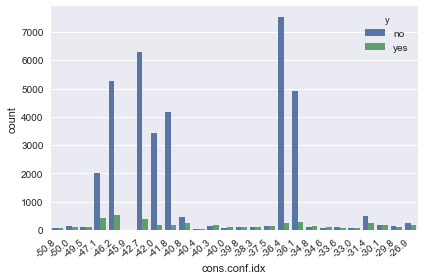

In [138]:
ax = sns.countplot(x="cons.conf.idx",hue='y', data=df_copy)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

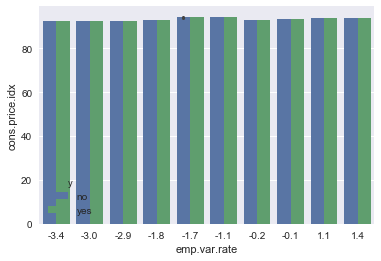

In [141]:
sns.barplot(x='emp.var.rate',y='cons.price.idx',hue='y',data=df_copy)
plt.show()

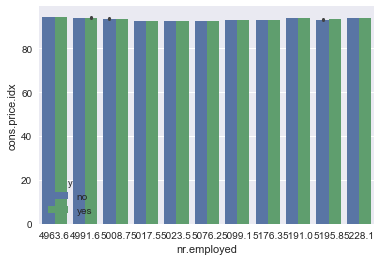

In [139]:
sns.barplot(x='nr.employed',y='cons.price.idx',hue='y',data=df_copy)
plt.show()

In [186]:
df2=df[df['y']=='yes'][['emp.var.rate','euribor3m','nr.employed','cons.price.idx','campaign']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9f05a75c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9f05a7cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9f05a7470>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9f05b2390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9f05b26d8>],
 'means': []}

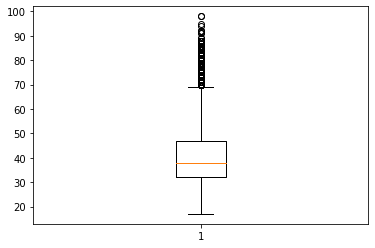

In [108]:
plt.boxplot(x=df['age'])